In [ ]:
#import all the required libraries
import pandas as pd #for dataFrames
import numpy as np  #for performing numerical applications
import seaborn as sb #for graphs
from matplotlib import pyplot as plt #for graphical presentation
from sklearn import metrics #to use accuracy, recall, precission, etc matrix
from sklearn.tree import DecisionTreeClassifier #for using Decission Tree algorithm
from sklearn.preprocessing import LabelEncoder #for performing Label encoding on categorical variables
from sklearn.linear_model import LogisticRegression #for perfrming Logistic Regression
from sklearn.model_selection import train_test_split #for splitting the data set into train and test
from sklearn.ensemble import RandomForestClassifier #for Random Forest Algorithm
from sklearn.ensemble import GradientBoostingClassifier #For using grdient Boost
from sklearn.ensemble import BaggingClassifier #For using Bagging
from sklearn.ensemble import AdaBoostClassifier #For using Adaboost
from sklearn.preprocessing import StandardScaler  #for scaling the data using z-score
from sklearn.preprocessing import MinMaxScaler #for scaling the data using minimum and max values
from sklearn.model_selection import GridSearchCV #for findging optimal values for hyperparameter tuning
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve , classification_report , confusion_matrix #calling all accuracy score matrix
from imblearn.over_sampling import SMOTE #for balancing the data set

**1. DATA UNDERSTANDING**

Load the files

In [ ]:
file1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
file2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [ ]:
print(file1.head())
print(file2.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No  
   customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No    

In [ ]:
print(file1.columns)
print(file2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')
Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


file 1 contains info about the gender of the customers, if they are a senior citixen or not, details about their partners and no of dependents, tenure (contract duration) with the telecom company, and details about the types of servies they have

File2 contains info about the technical services that the customers use, their contract type, payment methods, monthly and total charges, and if the customer is likely to churn (i.e leave as a customer for next month)

In [ ]:
#combining files using customer id
file = file1.merge(file2, on = "customerID")
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the type for each columns


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


checking if all columns are present in the main file

In [ ]:
df1 = list(file2.columns) #checking if all the column names from file 1 are present in main file, using in 
df = list(file.columns)
for x in df1:
    print(x, "is present in mainfile:" , x in df)

customerID is present in mainfile: True
OnlineBackup is present in mainfile: True
DeviceProtection is present in mainfile: True
TechSupport is present in mainfile: True
StreamingTV is present in mainfile: True
StreamingMovies is present in mainfile: True
Contract is present in mainfile: True
PaperlessBilling is present in mainfile: True
PaymentMethod is present in mainfile: True
MonthlyCharges is present in mainfile: True
TotalCharges is present in mainfile: True
Churn is present in mainfile: True


In [ ]:
df2 = list(file2.columns)  #checking if all the column names from file 2 are present in main file, using in 
for y in df2:
    print(y, "is present in mainfile:" , x in df)

customerID is present in mainfile: True
OnlineBackup is present in mainfile: True
DeviceProtection is present in mainfile: True
TechSupport is present in mainfile: True
StreamingTV is present in mainfile: True
StreamingMovies is present in mainfile: True
Contract is present in mainfile: True
PaperlessBilling is present in mainfile: True
PaymentMethod is present in mainfile: True
MonthlyCharges is present in mainfile: True
TotalCharges is present in mainfile: True
Churn is present in mainfile: True


**2. DATA CLEANING**

Imputing Missing Values

In [ ]:
#checing missing values in each column
file.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

hence there are no missing values, checking for any unexpected values, we find that there are some values represented as "  ", hnece replacing those with null values, then treating it

Coverting all continuous variables with continuous values to Float, here only TotalCharges

In [ ]:
file["TotalCharges"] = pd.to_numeric(file.TotalCharges, errors = "coerce") #hence changing the data type to numeric, and making errors = coerc, will allow to interpret " " value also as a float

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking null values now
file.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Hence we can see that we have 11 missing values in the column Total Charges, hence replacing that with median

In [ ]:
file["TotalCharges"] = file["TotalCharges"].fillna(file["TotalCharges"].median())

Now checking for null values again to verify

In [ ]:
file.isnull().sum() #hence all missing values are treated
file = file.drop("customerID", axis = 1)

checking which column has highest impact on the target variable Churn

In [ ]:
file_cat_2 = file.select_dtypes(exclude = np.number)
file_cat_excl = file_cat_2.drop("Churn", axis =1)
for i in file_cat_excl.columns:
  print(pd.crosstab(file_cat_2["Churn"], file_cat_excl[i], values=file["Churn"], aggfunc='count'))

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
OnlineSecurity    No  No internet service   Yes
Churn                                          
No              2037                 1413  1724
Yes             1461                  113   295
OnlineBackup    No  No internet service   Yes
Churn                                        
No            1855      

From above data we can interpret that people who have annual, or two year contract are more unlikely to churn, when compared to the ones with monthly contract

In [ ]:
print(file.groupby("Churn")["SeniorCitizen"].count())

Churn
No     5174
Yes    1869
Name: SeniorCitizen, dtype: int64


Senior Citizens are not likely to churn


Creating a function to take data frame as input, and return pie chart
To create a function we use input method



In [ ]:

def chart():
  offset = 1
  file_cat = file.select_dtypes(exclude = np.number) #to include only categorical columns
  plt.figure(figsize = (15,15)) #specifying the size of each pie chart
  for i in file_cat.columns:
    plt.subplot(6,3,offset) #here we set offset to 1 , specifying the position of 1st pie chart, then gradually increase the offset value
    plt.title(i) #to print the title of each chart
    plt.pie(file_cat[i].value_counts(), labels = file_cat[i].unique(), autopct = "%1.1f%%") #
    offset+=1
  plt.show()    



#autopct is used to display % values, 0.2f denotes the decimal places

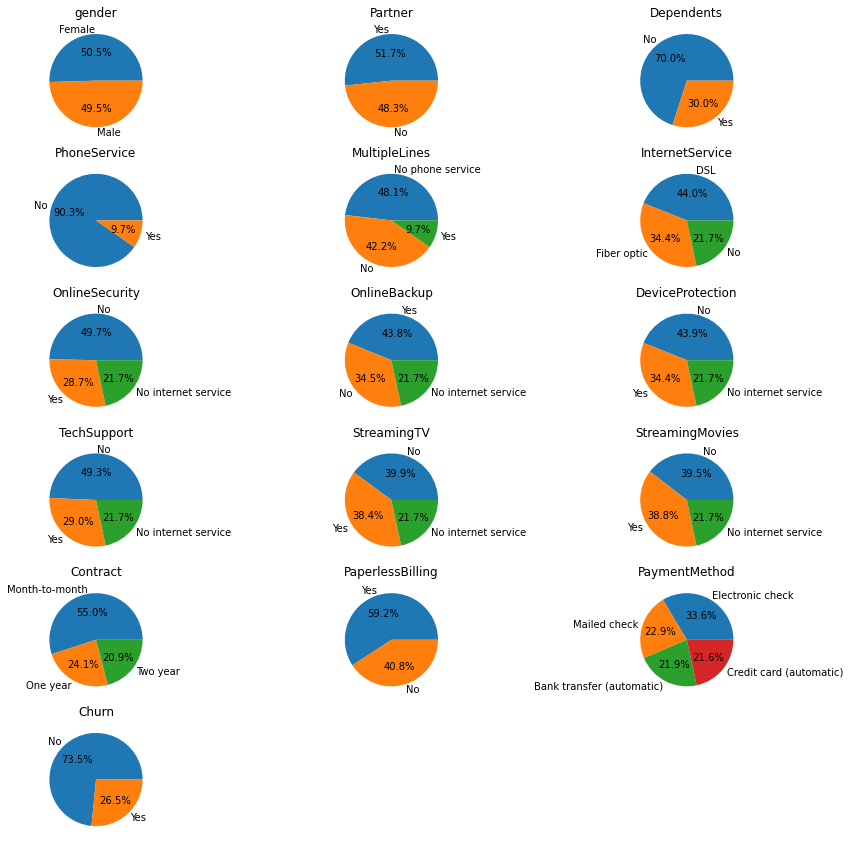

In [ ]:
chart()

plotting pie plots by calling the function

based on the above pie charts we have 50% of each gender category, Payment method is highest for payments through electronic check, and rest of the payment methods have equal importance.

Contract period is monthly for 50% of the sample, and for the rest of the 50% contract period is divided equally between 2 months and one year.

Around 50% of the sample have DSL internet connection, 34% have Fiber optic, and the remaining 22% have no internet connection

Plotting corrrelation heatmap

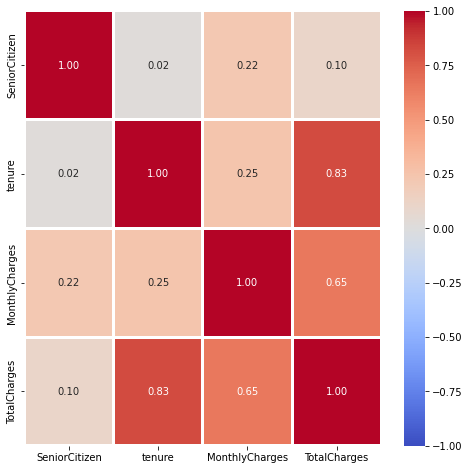

In [ ]:
cor = file.corr()
plt.figure(figsize = (8,8))
sb.heatmap(cor, annot = True, vmin = -1, vmax = 1, fmt = "0.2f", linewidth = 2, linecolor= "white", cmap  = "coolwarm")

In [ ]:
#there is some significant correlation between tenure and total charges

plotting box plots for numerical values to check fir any outliers


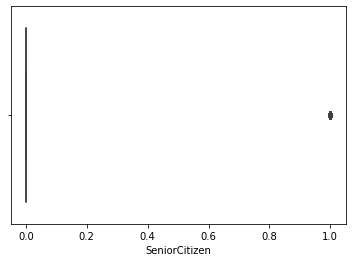

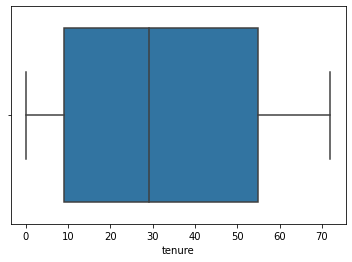

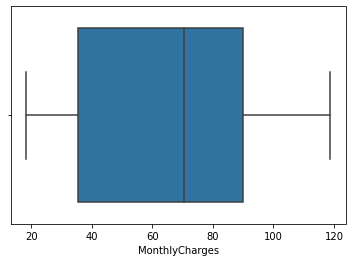

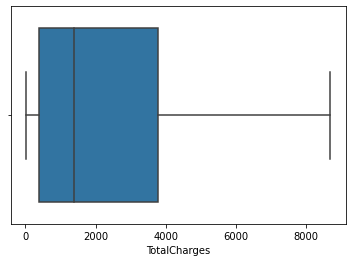

In [ ]:
file_num = file.select_dtypes(include = "number")
for i in file_num.columns:
  sb.boxplot(x = file[i])
  plt.show()

hence we can see that there are almost no outliers in the data , except for one outlier in Senior Citizen

**Perfroming Encodings to change categorical columns to numerical**

Performing Label encoding for  the rest of the columns

In [ ]:
labelenc = LabelEncoder()
for i in file[["gender", "Partner", "Dependents","OnlineSecurity", "PhoneService","OnlineBackup","DeviceProtection","Churn","PaperlessBilling","MultipleLines", "InternetService", "Contract","PaymentMethod", "TechSupport", "StreamingTV","StreamingMovies"]]:
  file[i] = labelenc.fit_transform(file[i])


In [ ]:
file.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Target Variable is whether a customer will churn from the service next month or not


Dividing the data set into train and test

In [ ]:
x = file.drop("Churn", axis = 1)
y = file["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state = 2) #we have specified test_size = 0.25, i.e 25% of the data will be used for testing, rest for training, random_state maintains the random sampling when command is sun by different people at different times
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6857,1,0,1,1,58,1,0,1,0,2,0,0,2,2,0,1,2,92.85,5305.05
4435,1,0,1,0,17,1,2,1,0,2,0,0,0,0,0,1,0,80.50,1336.90
6444,1,0,0,1,31,1,2,0,0,2,0,2,2,2,1,1,3,79.45,2587.70
4247,1,0,1,1,69,1,0,1,2,2,0,2,2,2,2,1,1,106.35,7261.75
2404,0,0,1,1,42,1,2,1,2,2,0,0,2,0,1,1,1,94.45,3923.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,9,1,0,2,1,1,1,1,1,1,0,0,0,19.50,150.35
3606,0,0,1,0,70,1,2,1,0,0,2,0,2,2,1,1,2,101.75,7069.30
5704,0,0,1,0,19,1,2,1,0,0,0,0,2,0,0,1,2,86.85,1564.40
6637,1,0,1,0,69,1,0,0,2,2,0,0,0,0,1,1,1,53.65,3804.40


Scaling the data values using Min max scaler as there are no outliers in the dataset


In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
#converting the array back to dataFrame
x_train = pd.DataFrame(x_train, columns = x.columns)

checking the no of each categorical variables in the target data, i.e checking if the sampling is equal

In [ ]:
y_train.value_counts()/len(y_train)*100

0    72.945854
1    27.054146
Name: Churn, dtype: float64

building the model with imbalanced data for Random For Decission Tree

In [ ]:
model_DT_imb = DecisionTreeClassifier(random_state = 2)
model_DT_imb.fit(x_train, y_train)
DT_imb_predict = model_DT_imb.predict(x_test)
DT_imb_accuracy = accuracy_score(y_test, DT_imb_predict)
print("Accuracy Score for imbalanced data is", DT_imb_accuracy)

Accuracy Score for imbalanced data is 0.7501419647927314


Hence the data is highly imbalanced, balancing the data sets

In [ ]:
over_sample = SMOTE(random_state = 50)
x_train,y_train = over_sample.fit_resample(x_train, y_train)

In [ ]:
#checking valucounts again
y_train.value_counts()/len(y_train)

0    0.5
1    0.5
Name: Churn, dtype: float64

hence the data set is balanced now


Fitting the models now

Logistic Regression

In [ ]:
model_LR = LogisticRegression() # calling the model
model_LR.fit(x_train, y_train) #fitting the model on training set

LogisticRegression()

In [ ]:
LR_predict = model_LR.predict(x_test) #predicting the value of y using x varibles in test data

In [ ]:
#printing accuracy scores between the actual and the predicted y values
LR_accuracy = accuracy_score(y_test,LR_predict)
#printing the accuracy score in DataFrame
df = pd.DataFrame({"Medthod":"Logistic Regression", "Accuracy":LR_accuracy}, index = {0})
df

,Medthod,Accuracy
0,Logistic Regression,0.249858


finding the coefficient and intercept values

In [ ]:
for i, col_name in enumerate(x_train.columns):
  print("The coefficent of {} is {}".format(col_name, model_LR.coef_[0][i]))


The coefficent of gender is 0.082263177941799
The coefficent of SeniorCitizen is 0.11844796732502606
The coefficent of Partner is 0.1414449990167294
The coefficent of Dependents is -0.23411434243561563
The coefficent of tenure is -3.825015780966841
The coefficent of PhoneService is -1.0493635468383176
The coefficent of MultipleLines is 0.0388977767021818
The coefficent of InternetService is 0.5683665588478974
The coefficent of OnlineSecurity is -0.5154120400259367
The coefficent of OnlineBackup is -0.32676487861439096
The coefficent of DeviceProtection is -0.1473025153971553
The coefficent of TechSupport is -0.6496768713448613
The coefficent of StreamingTV is 0.08557152183100115
The coefficent of StreamingMovies is -0.0015078853745843078
The coefficent of Contract is -1.6671149798007232
The coefficent of PaperlessBilling is 0.4171672355633824
The coefficent of PaymentMethod is 0.269283103674887
The coefficent of MonthlyCharges is 2.487698157439228
The coefficent of TotalCharges is 1.91

In [ ]:
intercept = model_LR.intercept_[0] #here we use [0] to display the location of value with index 0, otherwise it will display as an array
intercept

0.6934000382549375

highest coefficients are for tenure, contract, monthly charges, and total charges

plotting confusion matrix

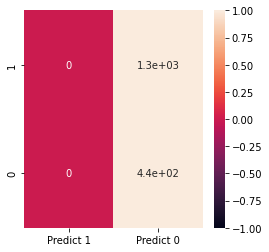

In [ ]:
cm = metrics.confusion_matrix(y_test, LR_predict)
df_cm = pd.DataFrame(cm, index = ["1","0"], columns = ["Predict 1", "Predict 0"])
plt.figure(figsize=(4,4))
sb.heatmap(df_cm, annot = True, vmin = -1, vmax = 1)

Decission Tree

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
DT_predict = model_DT.predict(x_test)
DT_accuracy = accuracy_score(y_test, DT_predict)

In [ ]:
#checking model accuracy on training and test data
# performance measuring
print('Performance on Training data using DT: ',model_DT.score(x_train , y_train))
print('Performance on Testing data using DT: ',model_DT.score(x_test , y_test))

Performance on Training data using DT:  0.9985725408772386
Performance on Testing data using DT:  0.7586598523566156


hence we can see that model accuracy is almost 100% on training data but only 77% on test data, hence overfitting is observed

In [ ]:
#checking featureimportance
feauture_imp = pd.DataFrame(model_DT.feature_importances_, columns = ["Feature Importance"], index = x_train.columns)
feauture_imp

,Feature Importance
gender,0.019244
SeniorCitizen,0.015285
Partner,0.018927
Dependents,0.015533
tenure,0.107828
PhoneService,0.006100
MultipleLines,0.015301
InternetService,0.038836
OnlineSecurity,0.045710
OnlineBackup,0.019529


hence we can see that contract, tenure, monthy charges and total charges have highest impact on the test variable

In [ ]:
#displaying using dataframe
df2 = pd.DataFrame({"Medthod":"Decision Tree Classifier", "Accuracy":DT_accuracy}, index = {1})
df = df.append(df2)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660


hence we can see that accuracy of Decision Tree classifier is much higher

Random Forest

In [ ]:
model_RF = RandomForestClassifier(random_state = 2)
model_RF.fit(x_train, y_train)
RF_predict = model_RF.predict(x_test)
RF_accuracy = accuracy_score(y_test, RF_predict)

In [ ]:
df3 = pd.DataFrame({"Medthod":"Random Forest Classifier", "Accuracy":RF_accuracy}, index = {2})
df = df.append(df3)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660
2,Random Forest Classifier,0.749574


Using Pruned Decision Tree - by using some hyperparameters

In [ ]:
model_DT_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth= 12, min_samples_leaf= 2, random_state = 3)
model_DT_pruned.fit(x_train, y_train)
DT_pruned_predict = model_DT_pruned.predict(x_test)
DT_pruned_accuracy = accuracy_score(y_test, DT_pruned_predict)

In [ ]:
df4 = pd.DataFrame({"Medthod":"Decision Tree Pruned", "Accuracy":DT_pruned_accuracy}, index = {3})
df = df.append(df4)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660
2,Random Forest Classifier,0.749574
3,Decision Tree Pruned,0.777967


hence accuracy is increased for regularized decission tree

Ensemble Methods - Bagging

In [ ]:
model_Bag = BaggingClassifier(base_estimator = model_DT, n_estimators = 60, random_state = 2) #specifying base classfiier as Decission Tree, and no of samplesubsets = 60
model_Bag.fit(x_train, y_train)
Bag_predict = model_Bag.predict(x_test)
Bag_accuracy = accuracy_score(y_test, Bag_predict)

In [ ]:
df5 = pd.DataFrame({"Medthod":"Bagging Classifier", "Accuracy":Bag_accuracy}, index = {4})
df = df.append(df5)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660
2,Random Forest Classifier,0.749574
3,Decision Tree Pruned,0.777967
4,Bagging Classifier,0.746167


Ada Boost

In [ ]:
model_Ada = AdaBoostClassifier(n_estimators=50, base_estimator = model_RF, random_state =5 )
model_Ada.fit(x_train, y_train)
Ada_predict = model_Ada.predict(x_test)
accuracy_Ada = accuracy_score(y_test, Ada_predict)

In [ ]:
df6 = pd.DataFrame({"Medthod":"Ada Boost Classifier", "Accuracy":accuracy_Ada}, index = {5})
df = df.append(df6)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660
2,Random Forest Classifier,0.749574
3,Decision Tree Pruned,0.777967
4,Bagging Classifier,0.746167
5,Ada Boost Classifier,0.750142


Gradient Boost

In [ ]:
model_Grad = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state = 5) #specifying learning rate less, means from each sample the model will learn little
model_Grad.fit(x_train, y_train)
Grad_predict= model_Grad.predict(x_test)
accuracy_Grad = accuracy_score(y_test, Grad_predict)


In [ ]:
df7 = pd.DataFrame({"Medthod":"Gradient Boost Classifier", "Accuracy":accuracy_Grad}, index = {6})
df = df.append(df7)
df

,Medthod,Accuracy
0,Logistic Regression,0.249858
1,Decision Tree Classifier,0.758660
2,Random Forest Classifier,0.749574
3,Decision Tree Pruned,0.777967
4,Bagging Classifier,0.746167
5,Ada Boost Classifier,0.750142
6,Gradient Boost Classifier,0.753549


hence from above models, best highest accuracy is for Decision Tree Classifier

**Hyper Parameter Tuning**
Using K fold cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings #needed to ignore the warrnings displayed, and to print the final output
warnings.filterwarnings('ignore')
kfold = KFold(n_splits = 7, shuffle = False) #here our data will be divided into 7 folds, numer of data points in each fold = n/k
results = cross_val_score(model_LR, x, y, cv = kfold)
print(results)
print("Accuracy is %0.2f%%"%(results.mean()*100))

[0.80039722 0.79125249 0.81510934 0.78827038 0.80516899 0.79522863
 0.80815109]
Accuracy is 80.05%


Hence we can see that using K fold Cross Validation, our model accuracy has highly increased

Hyper Parameter Tuning - **Using Grid Search CV**


Using grid search Cv for random Forest Classifier , for deciding the value for number of samples to divide the data set into

In [ ]:
param_values = {"n_estimators" : list(range(10,20))}
gcv = GridSearchCV(estimator = model_RF, param_grid = param_values, return_train_score = True) #applying Grid Search CV for model Ranfom Forest, for a range of n_estimator values
gcv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2),
             param_grid={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19]},
             return_train_score=True)

In [ ]:
dfgcv = pd.DataFrame(gcv.cv_results_) #to diaply the reults of the above in the form of a data frame
dfgcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092603,0.012989,0.006874,0.000599,10,{'n_estimators': 10},0.752270,0.778066,0.880597,0.852044,...,0.831311,0.056247,10,0.992051,0.989619,0.988808,0.988808,0.987672,0.989391,0.001467
1,0.094839,0.004466,0.006849,0.000418,11,{'n_estimators': 11},0.771077,0.793640,0.875406,0.854640,...,0.837927,0.047660,6,0.992213,0.992052,0.990430,0.990430,0.991079,0.991241,0.000767
2,0.103376,0.005135,0.006822,0.000195,12,{'n_estimators': 12},0.761349,0.781311,0.879299,0.855289,...,0.835463,0.054614,9,0.993348,0.993187,0.990754,0.991565,0.991403,0.992052,0.001031
3,0.103924,0.002840,0.007087,0.000327,13,{'n_estimators': 13},0.767185,0.793640,0.876703,0.849448,...,0.836111,0.048337,8,0.993186,0.994161,0.992376,0.992701,0.993187,0.993122,0.000603
4,0.115084,0.006234,0.007751,0.000232,14,{'n_estimators': 14},0.760700,0.784555,0.881246,0.856587,...,0.836760,0.054722,7,0.993835,0.994323,0.992214,0.992539,0.993350,0.993252,0.000785
5,0.123867,0.002894,0.008122,0.000253,15,{'n_estimators': 15},0.767185,0.799481,0.878650,0.861778,...,0.840134,0.048543,5,0.994971,0.995945,0.993187,0.993350,0.993836,0.994258,0.001049
6,0.129597,0.004985,0.008860,0.000801,16,{'n_estimators': 16},0.766537,0.790396,0.890331,0.865672,...,0.842989,0.054498,2,0.995133,0.995458,0.993836,0.994161,0.994323,0.994582,0.000612
7,0.139904,0.003851,0.010026,0.001192,17,{'n_estimators': 17},0.767834,0.804672,0.885140,0.864374,...,0.843638,0.049349,1,0.995944,0.996107,0.993512,0.995296,0.994809,0.995134,0.000935
8,0.147977,0.004241,0.009613,0.000348,18,{'n_estimators': 18},0.768482,0.792343,0.890980,0.862427,...,0.842600,0.052740,4,0.996106,0.995458,0.994972,0.995620,0.995296,0.995491,0.000375
9,0.143896,0.004665,0.009503,0.000802,19,{'n_estimators': 19},0.771725,0.798832,0.884491,0.865023,...,0.842859,0.048706,3,0.997242,0.996107,0.995296,0.995296,0.995134,0.995815,0.000790


plotting the graph of the value of k,(no of splits) and the mean of the score for training and test data

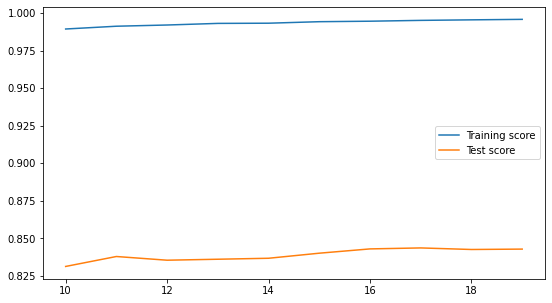

In [ ]:
plt.subplots(figsize = (9,5))
plt.plot(dfgcv["param_n_estimators"], dfgcv["mean_train_score"], label = "Training score")
plt.plot(dfgcv["param_n_estimators"], dfgcv["mean_test_score"], label = "Test score")
plt.legend() #to display the label values
plt.show()

from graph we can see that accuracy score is high for values from 18 - 20, applying random classifier for n = 19, and 20

In [ ]:
model_RFCL = RandomForestClassifier(n_estimators = 19, random_state = 2)
model_RFCL.fit(x_train, y_train)
RFCL_predict = model_RFCL.predict(x_test)
RFCL_accuracy = accuracy_score(y_test, RFCL_predict)

In [ ]:
print("Accuracy Score is " , RFCL_accuracy)
print ( "Test Classification Report:\n" , classification_report ( y_test , RFCL_predict ) ) #to display each score

Accuracy Score is  0.747870528109029
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1321
           1       0.17      0.00      0.00       440

    accuracy                           0.75      1761
   macro avg       0.46      0.50      0.43      1761
weighted avg       0.60      0.75      0.64      1761



In [ ]:
model_RFCL2 = RandomForestClassifier(n_estimators = 20, random_state = 2)
model_RFCL2.fit(x_train, y_train)
RFCL2_predict = model_RFCL2.predict(x_test)
RFCL2_accuracy = accuracy_score(y_test, RFCL2_predict)

In [ ]:
print("Accuracy Score is " , RFCL2_accuracy)
print ( "Test Classification Report:\n" , classification_report ( y_test , RFCL2_predict ) ) #to display each score

Accuracy Score is  0.747870528109029
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1321
           1       0.00      0.00      0.00       440

    accuracy                           0.75      1761
   macro avg       0.37      0.50      0.43      1761
weighted avg       0.56      0.75      0.64      1761



From Above methods we can say that the k fold, with Logostic Regression, gives best performance score.
and the best performing model is regularized decission tree
Checking feature importance of best performing model



In [ ]:
feauture_imp2 = pd.DataFrame(model_DT_pruned.feature_importances_, columns = ["Feature Importance"], index = x_train.columns)
feauture_imp2

,Feature Importance
gender,0.008084
SeniorCitizen,0.004217
Partner,0.010076
Dependents,0.011465
tenure,0.097622
PhoneService,0.006503
MultipleLines,0.013337
InternetService,0.050152
OnlineSecurity,0.061110
OnlineBackup,0.019532


features which have most impact are tenure, contract period, monthly charges, and total charges
with Contract period having the maximum impact

**Concusion:**
We can advise the company to introduce more offers with two year, and annual contract, and drive the people towards two year, and annual contract, as people who belong to this category are less likely to churn when compared to the ones who have signed monthly contract